# Mini projet

## Mise en place de l'espace de travail
Pour réaliser le projet nous utilisons la plateforme JupyterHub fournie par les enseignants.

Pour collaborer, nous utilisons un dépot git hébergé sur github.

Pour la gestion de projet nous utilisons Trello

## Recherche documentaire

- Modélisation stochastique macroscopique d'ordre supérieur du trafic sur les réseaux routiers : implications managériales.
Article intéressant et assez poussé. Il cite beaucoup de références et peut êre un point de départ pour trouver d'autres articles intéressants. Mais pas de représentation graphique
https://rfgi.fr/rfgi/article/view/1156

- Article de journal pour expliquer la formation des bouchons. Pas mal pour la partie vulgarisation
https://theconversation.com/comment-se-forment-les-embouteillages-163994

- Pareil, vulgarisation :
https://www.youtube.com/watch?v=wHz6S2dbYb4

- Un repo sympa a aller voir. Il utilise pygame pour la représentation
https://github.com/alokin-fr/road-traffic-simulation

- Un article chouette pour la modélisation et la représentation (le site est un peu chelou mais l'article vaut le coup)
https://ichi.pro/fr/simulation-du-flux-de-trafic-en-python-261815490433551

- https://www.youtube.com/watch?v=4DRGo3NUM_k

    **Éléments clefs de la vidéo (modélisation mathématique)**:
    
    Workflow du problème : Définition du problème $\to$ Choix des variables $\to$ Hypothèses sous-jacentes $\to$ Construction du modèle $\to$ Évaluation du modèle
    
    Exemple trivial pour commencer : la route droite, avec des voitures en file indienne, si la voiture de devant ralentit, les voitures de derrière vont aussi ralentir, cet effet peut se démultiplier. 
    
    Le conducteur a essentiellement le contrôle sur son ralentissement/accélération (variables), celles-ci sont influencées par : 
    - La distance entre les deux voitures
    - La vitesse relative 
    - On peut penser à encore plus de variables : obstacles imminents, état émotionnel/physique du conducteur, présence de radars, état de la route etc.
    
    **Le choix des variables est un reflet de la visée de notre modèle i.e. ce qu'on cherche à mettre en évidence**.
    
    Hypothèses possibles : 
    - Les voitures ont la même masse $m$ et longueur $L$
    - Une seule voie (pas de doublement)
    - La position des voitures est l'avant du véhicule, dénotée par $x_i(t)$
    - A priori, on ne veut pas d'accident, donc on impose : $$ x_i(t)<x_{i-1}(t) + L$$
    
    Modèle : 
    - Avec nos deux variables, on peut supposer que plus la vitesse relative est grande, plus la force de freinage sera importante. De la même manière, plus la distance relative sera petite, plus la force de freinage sera importante. On peut donc supposer en premier lieu qu'on a la relation suivante : $$ m \cdot x''_{i}(t) = c\frac{x'_{i}(t)-x'_{i-1}(t)}{\left|x_{i}(t)-x_{i-1}(t)\right|}$$
    Comme l'humain ne réagit pas instantanément, on peut corriger la première approximation grossière en rajoutant un temps de réaction $\tau$ : $$ m \cdot x''_{i}(t+\tau) = c\frac{x'_{i}(t)-x'_{i-1}(t)}{\left|x_{i}(t)-x_{i-1}(t)\right|}$$ 
    On peut supposer que le temps de réaction $\tau$ est le même pour tous les conducteurs (nouvelle hypothèse).
    
        En intégrant une première fois : $$v_{i}(t+\tau) = C\ln(\left| x_{i}(t)-x_{i-1}(t)\right|)+D_i$$
        
    Avec notre modèle, on cherche à optimiser le trafic, c'est-à-dire atteindre un équilibre, on pourrait le définir comme les conditions suivantes : 
    - Les voitures ont la même vitesse $v$
    - La distance entre les voitures est $d$
    
    On pourra alors parler de densité $\rho$ et on pourra étudier la vitesse des voitures en fonction de $\rho$ par exemple.
    
    On pourra par ailleurs étudier les petites variations des positions $x_{i}(t)$ autour de leurs positions d'équilibre et les répercussions sur le trafic. Il faudra donc bien modéliser la *première* voiture qui est à l'origine de la perturbation. Un modèle possible parmi tant d'autres serait : 
    - La voiture commence avec la vitesse d'équilibre
    - Elle freine légèrement entre $t=0$ et $t=t_1$
    - Elle revient à sa vitesse d'équilibre après
    - Sa vitesse est donnée par $$ x'_{1}(t) = \left\{ \begin{array}{cl}
v &, & \ t \leq 0 \\
v(1-kt\exp(\frac{t_1-t}{t_1})) &, & \ t > 0
\end{array} \right.$$

    Cela nous permettra d'étudier la perturbation sur chaque voiture dans le temps.

- https://www.youtube.com/watch?v=YbERBok9s0I et https://www.youtube.com/watch?v=tDMMyNQZuF8

    Cours très intéressants sur la typologie des modèles mathématiques d'étude du trafic de voiture, ils rentrent dans les détails croustillants (EDP, conditions aux bords, algorithme de résolution etc.)
    
    **Éléments clefs de la vidéo** :
    
    On distingue 4 grandes famille de modèles de traffic : microscopique, macroscopique, mésoscopique, stochastique. On s'intéresse ici au modèle macroscopique.
    Il s'agit ici de voir ce modèle de traffic comme l'étude d'un fluide. 
    
    Hypothèses globales possibles :
    - Les conducteurs respectent les règles du code
    - La longueur des voitures est la même, on a une approche macroscopique, c'est une hypothèse raisonnable.
    
    Observation liminaire : 
    - Lorsqu'on regarde le traffic de très loin, le déplacement macroscopique des véhicules s'apparente à l'écoulement d'un fluide. On peut supposer que le mouvement macroscopique des véhicules ressemble à l'écoulement d'un fluide compressible à une dimension.
    
    Hypothèses spécifiques au modèle macroscopique :
    - Le flux du traffic est conservé (équation de continuité) : aucune voiture n'est créée de nulle part ni détruite.
    - Il existe une relation bijective entre vitesse et densité, ainsi qu'entre flux et densité.
    - On suppose que le nombre de voitures est assez grand pour que la densité moyenne et le flux moyen soient des fonctions de classe $\mathcal{C^1}$ d'espace et de temps.
    
    Définition des variables :
    - Densité : $\overrightarrow{\rho}(x,t)$ : nombre de voitures par unité de longueur à un instant $t$
    - Densité de flux : $\overrightarrow{j}$ : nombre de voitures dépassant un point donné par unité de temps.
    - Vitesse : $\overrightarrow{v}(x,t)$
    - On a : $\overrightarrow{j} = \rho \cdot \overrightarrow{v}$
    
    Modèle :
    On rappelle l'équation de continuité : $$\frac{\partial \rho}{\partial t} +\overrightarrow{\nabla}\cdot \overrightarrow{j}=0 \quad ,$$
    avec $\overrightarrow{\nabla}\cdot$ l'opérateur divergence.
    
    A une dimension, cela se ramène à : $$\frac{\partial \rho}{\partial t} + \frac{\partial j}{\partial x} =0$$

    On a besoin d'une condition initiale : la densité initiale, à $t=0$, $$\rho(x,0)=\rho_0$$ 
    
    Par ailleurs, cette EDP d'ordre 1 est résolvable, si $v = v(\rho)$, on aura alors deux équations exploitables.
    
    On peut résoudre analytiquement (courbes caractéristiques) ou numériquement.
    
    Examinons les propriétés que devrait satisfaire la relation vitesse et densité:
    - $\frac{\mathrm{d}v}{\mathrm{d}\rho}<0$ : $v$ devrait être une fonction décroissante de la densité.
    - $v=v_{max}$ lorsque $\rho =0$
    - $v=0$ lorsque $\rho = \rho_{max}$
    
    - **Modèle de Greenshield** : une première approche pourrait être de supposer qu'il existe une relation linéaire entre $v$ et $\rho$ telle que : $$v = v_{max}(1-\frac{\rho}{\rho_{max}})$$
    On vérifie aisément que les trois conditions sur la relation entre vitesse et densité sont vérifiées.
    On a par ailleurs : 
    $$j = v_{max}(\rho - \frac{\rho^2}{\rho_{max}})$$
    On pourra faire un graphique de $v$ en fonction de $\rho$,et également de $j$ en fonction de $\rho$.
    On vérifie aisément que le maximum de $j$ est atteint en $\rho = \frac{\rho_{max}}{2}$ et vaut $j_{max} = \frac{v_{max}\rho_{max}}{4}$.
    - **Modèle de Greenberg** : $$v = v_{max}\log(\frac{\rho_{max}}{\rho}) \quad ,$$ on a bien les trois conditions qui sont vérifiées.
    On a par ailleurs : 
    $$j = v_{max}\rho\log(\frac{\rho_{max}}{\rho}) $$
    - **Modèle de Underwood** : $$v = v_{max}\exp(-\frac{\rho}{\rho_{max}})$$
    On a : 
    $$j = v_{max}\rho\exp(-\frac{\rho}{\rho_{max}}) $$
    - **Modèle de Pipes et Munjal** : $$v = v_{max}\big(1-(\frac{\rho}{\rho_{max}})^n \big) \quad , \quad n \gt 1$$
    On a : 
    $$j = v_{max}\rho\big(1-(\frac{\rho}{\rho_{max}})^n \big)$$        

Concentrons-nous sur un modèle : celui de Lighthill, Whitham et Richards.

On part de l'équation de continuité avec les hypothèses qui vont bien : 
$$\frac{\partial \rho}{\partial t} + \frac{\partial j}{\partial x} =0$$

On a par ailleurs une relation : 
$$ v = v(\rho) $$

Des conditions initiales et aux limites :

$$\left\{ \begin{array}{cl}
\rho(x,0) & = \ \rho_0(x) \\
\rho(0,t) & = \ \alpha \\
\rho(L,t) & = \ \beta
\end{array} \right.$$

Commençons la résolution de notre problème : 

On cherche d'abord à discrétiser la route, *i.e.* notre abcisse $(Ox)$ donnée par l'intervalle $[0,l]$, où $l$ est la longueur de la route. 
On a donc : 

$$x(i+1) = x(i) + \mathrm{d}x \quad , \quad i \in [\![1,n-1]\!]$$

où : $\mathrm{d}x = \frac{l}{n-1}$

De la même manière : 

$$t(j+1) = t(j) + \mathrm{d}t $$

où $\mathrm{d}t = \frac{T}{m-1}$, avec $T$ : la durée considérée divisée en m-1 intervalles

De l'équation de continuité, on tire : 

$$\frac{\partial\rho}{\partial t} + \frac{\partial \rho}{\partial x} \cdot v + \frac{\partial v}{\partial x} \cdot \rho = 0$$

Et par définition : 

$$ \frac{\partial \rho}{\partial t} = \lim_{\mathrm{d}t \to 0} \frac{\rho(x,t+\mathrm{d}t)-\rho(x,t)}{\mathrm{d}t} $$

## Modèle

On s'intéresse à la modélisation d'une portion de route droite à une seule voie. On souhaite faire évoluer continuellement des voitures sur cette route.

Je représente chaque voiture de manière discrète par sa position, sa longueur et sa vitesse.

La modélisation repose fortement sur le comportement de l'automobiliste. L'automobiliste se comporte comme un automate déterministe qui connaît la distance avec une ou plusieurs voitures autor de lui et la vitesse relative. Cet automate interragit avec la voiture seulement en freinant ou en accélérant. On se donne un cadre de modélisation général qui prends en compte plusieurs critères du comportement d'un automobiliste :
- La vitesse de réaction qui se traduit par un délai entre l'évènement induisant une réaction et l'application de l'action par l'automobiliste
- L'accélération maximale / La force maximale de freinage
- La vitesse maximale
- Le temps minimal avec les voitures précédentes

Comme l'accélération maximale et la force maximale de freinage sont finies, la vitesse est une fonction continue.

On va chercher au préalable d'étudier l'impact des différents paramètres de modélisation sur le comportement de l'automobiliste.

## Modélisation préalable

Dans un premier temps je m'intéresse à la représentation possible d'une voiture sur une route circulaire. Je choisis une route circulaire de taille 1km, et une voiture se déplaçant à 30 km.h-1. La voiture tourne dans le sens direct et j'identifie sa position à l'instant t par la distance parcourue depuis le temps t=0.

On a donc $d = v * t$

Je crée une fonction qui permet d'obtenir la distance parcourue, la vitesse et l'accélération (tangentielle) de la voiture à des instants donnés.

In [98]:
import numpy as np

_maxSpeed = 30 / 3.6  # m.s-1
_trackLen = 1000    # m

def getCarKinematics(l_t):
    '''Donne la position angulaire de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    # Angle
    retVal[0, :] = np.mod(_maxSpeed * l_t, _trackLen)
    # Vitesse
    retVal[1, :] = np.ones(len(l_t)) * _maxSpeed
    # Accel
    retVal[2, :] = 0
    return retVal

A partir de ces donnés je peux tracer la position de la voiture en fonction du temps, sa vitesse et son accélération. Je vais avoir besoin de régulièrement afficher ces graphes alors je crée une fonction à cet effet.

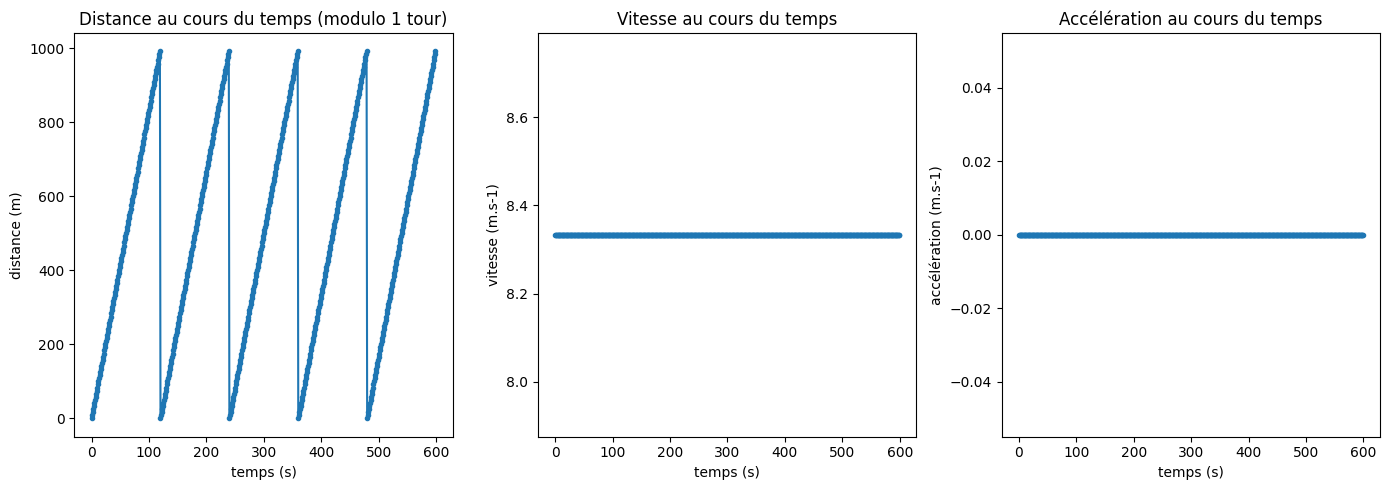

In [99]:
np_times = np.arange(0, 60*10, 1) # en secondes
np_carKinematics = getCarKinematics(np_times)

import matplotlib.pyplot as plt

def showCarKinematics(np_carKinematics):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5)) 
    
    axs[0].plot(np_times, np_carKinematics[0, :], '.-')
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    
    axs[1].plot(np_times, np_carKinematics[1, :], '.-')
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    
    axs[2].plot(np_times, np_carKinematics[2, :], '.-')
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

showCarKinematics(np_carKinematics)

Je cherche maintenant à faire évoluer le comportement de la voiture. Je souhaite que la voiture accélère avec une accélération constante jusqu'à une vitesse maximale de 30 km.h-1 puis qu'elle stabilise sa vitesse.

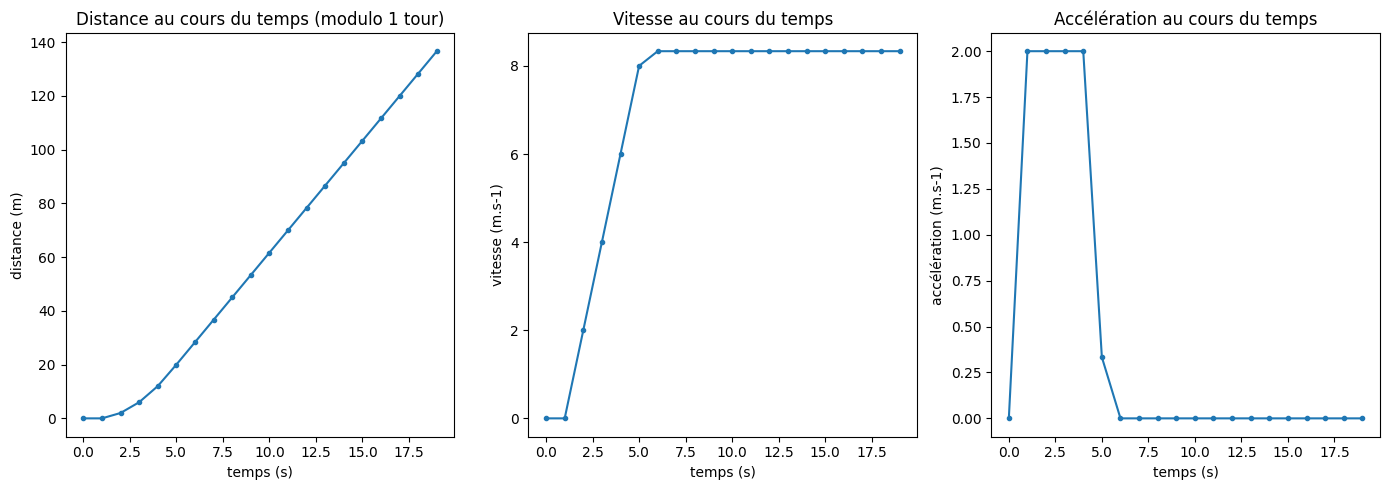

In [107]:
_accelMax = 2 #m.s-2
_accelMin = 0.2 #m.s-2

_breakMax = 10 #m.s-2
_breakMin = 2 #m.s-2

def getCarKinematics(l_t):
    '''Donne la position angulaire de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    retVal[2, 0] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(1, len(l_t)) :
        delta_t = l_t[i] - l_t[i-1]
        
        if (retVal[1, i-1] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            desiredAccel = min((_maxSpeed - retVal[1, i]) / delta_t, _accelMax)
            if (desiredAccel < _accelMin):
                desiredAccel = 0
            retVal[2, i] = desiredAccel
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
        
        retVal[1, i] = retVal[1, i-1] + retVal[2, i-1] * delta_t
        retVal[0, i] = retVal[0, i-1] + retVal[1, i] * delta_t
    return retVal

# On affiche la nouvelle cinématique
np_times = np.arange(0, 20, 1) # en secondes
showCarKinematics(getCarKinematics(np_times))

On constate qu'avec cette approche on obtient un délai de réaction naturel qui corresponds à delta_t.

Je souhaite maintenant que la voiture ralentisse si un obstacle se présente puis s'arrête avant l'obstacle. Je place un obstacle fictif à la position 150 mètres. Je souhaite que la voiture commence à freiner à l'approche de cet obstacle et s'arrète juste avant. Il faut définir une distance à partir de laquelle commencer à freiner.

On cherche à trouver la distance d'arrêt si on freine au minimum. En résolvant les équations du mouvement on obtient $v = a*t + v_0$. Comme on veut $v = 0$ à la fin du freinage on a $t = -v_0/a$. La position finale sera donc $d = \frac{1}{2}at^2 + v_0t + d_0$.

A la pos 0.0 et vitese 0.0 on s'arrête en 0.0s soit 0.0m
A la pos 0.0 et vitese 0.0 on s'arrête en 0.0s soit 0.0m
A la pos 2.0 et vitese 2.0 on s'arrête en 1.0s soit 5.0m
A la pos 6.0 et vitese 4.0 on s'arrête en 2.0s soit 18.0m
A la pos 12.0 et vitese 6.0 on s'arrête en 3.0s soit 39.0m
A la pos 20.0 et vitese 8.0 on s'arrête en 4.0s soit 68.0m
A la pos 30.0 et vitese 10.0 on s'arrête en 5.0s soit 105.0m
A la pos 40.3 et vitese 10.3 on s'arrête en 5.2s soit 120.4m
A la pos 48.7 et vitese 8.3 on s'arrête en 4.2s soit 100.8m
A la pos 55.0 et vitese 6.3 on s'arrête en 3.2s soit 85.1m
A la pos 61.3 et vitese 6.3 on s'arrête en 3.2s soit 91.4m
A la pos 69.7 et vitese 8.3 on s'arrête en 4.2s soit 121.8m
A la pos 80.0 et vitese 10.3 on s'arrête en 5.2s soit 160.1m
A la pos 90.3 et vitese 10.3 on s'arrête en 5.2s soit 170.4m
A la pos 98.7 et vitese 8.3 on s'arrête en 4.2s soit 150.8m
A la pos 105.0 et vitese 6.3 on s'arrête en 3.2s soit 135.1m
A la pos 109.3 et vitese 4.3 on s'arrête en 2.2s s

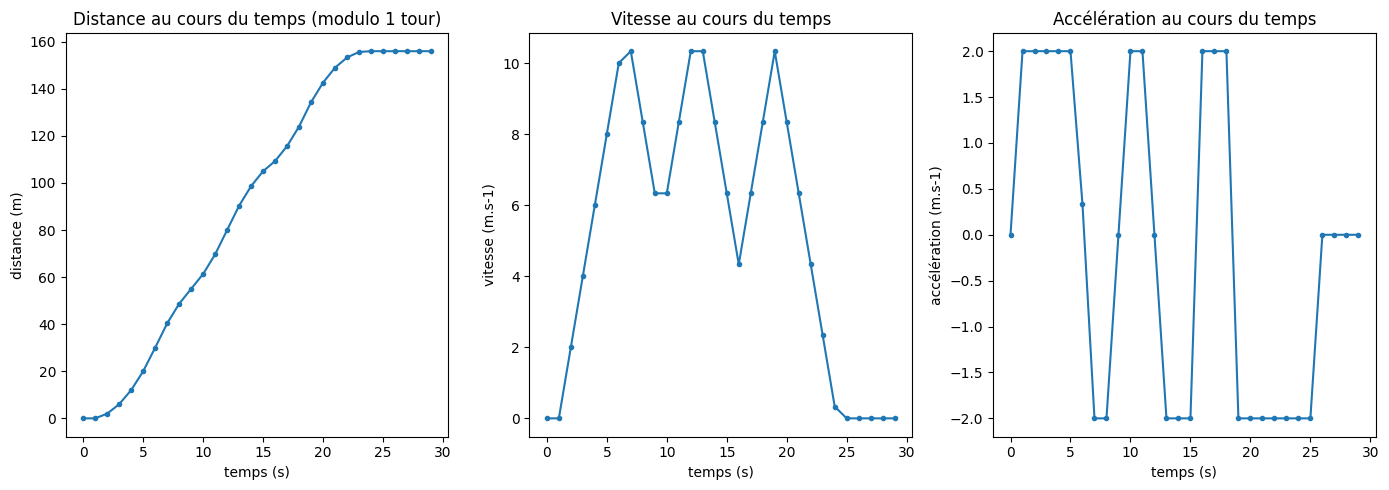

In [118]:
def getBreakingForce(pos, speed) :
    # Calcule la distance d'arrêt si on freine au minimum
    timeBreaking = speed / _breakMin
    breakingDistance = 1/2 * _breakMin*timeBreaking**2 + speed*timeBreaking + pos
    print(f"A la pos {pos:.1f} et vitese {speed:.1f} on s'arrête en {timeBreaking:.1f}s soit {breakingDistance:.1f}m")
    
    # TODO calculer la force de freinage dans le range min max
    if (breakingDistance > 150) :
        return _breakMin
    else :
        return 0

def getCarKinematics(l_t):
    '''Donne la position angulaire de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    retVal[2, 0] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(1, len(l_t)) :
        delta_t = l_t[i] - l_t[i-1]
        
        # On récupère la force de freinage dues aux obstacles
        breakingForce = getBreakingForce(retVal[0, i-1], retVal[1, i-1])
        if (breakingForce > 0) :
            # On freine à cause d'un obstacle
            
            # TODO éviter les vitesses négatives avec un meilleur algo
            if (retVal[1, i-1] > 0):
                retVal[2, i] = -breakingForce
            else :
                retVal[2, i] = 0
        elif (retVal[1, i-1] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            desiredAccel = min((_maxSpeed - retVal[1, i-1]) / delta_t, _accelMax)
            if (desiredAccel < _accelMin):
                desiredAccel = 0
            retVal[2, i] = desiredAccel
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
        
        retVal[1, i] = max(retVal[1, i-1] + retVal[2, i-1] * delta_t, 0) # Pas de vitesse négative
        retVal[0, i] = retVal[0, i-1] + retVal[1, i] * delta_t
    return retVal

# On affiche la nouvelle cinématique
np_times = np.arange(0, 30, 1) # en secondes
showCarKinematics(getCarKinematics(np_times))